# Predicting the Flight price 

In [1]:
import sys    #for python version
import sklearn
import pandas
import numpy
import seaborn
import matplotlib

print('Python: {}'.format(sys.version))
print('Scikit-learn: {}'.format(sklearn.__version__))
print('Pandas: {}'.format(pandas.__version__))
print('Numpy: {}'.format(numpy.__version__))
print('seaborn: {}'.format(seaborn.__version__))
print('matplotlib: {}'.format(matplotlib.__version__))

Python: 3.7.6 (default, Jan  8 2020, 20:23:39) [MSC v.1916 64 bit (AMD64)]
Scikit-learn: 0.24.0
Pandas: 1.0.1
Numpy: 1.19.5
seaborn: 0.10.0
matplotlib: 3.1.3


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style
style.use('ggplot')
import seaborn as sns

## Display all the columns of the dataframe
pd.pandas.set_option('display.max_columns',None)

In [3]:
df_train=pd.read_excel('Data_Train.xlsx')
df_test=pd.read_excel('Test_set.xlsx')

In [6]:
df_train.head()


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [7]:
#shape of dataset with rows and columns
print("Input data has {} rows and {} col".format(len(df_train),len(df_train.columns)))
print("Input data has {} rows and {} col".format(len(df_test),len(df_test.columns)))


Input data has 10683 rows and 11 col
Input data has 2671 rows and 10 col


In [9]:
df_train.info(),df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_o

(None, None)

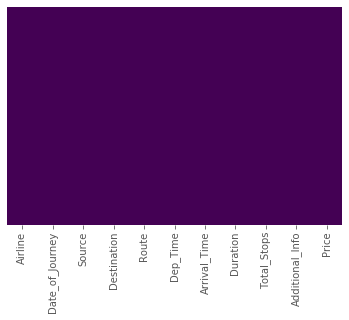

In [10]:
#check for null values in dataset
sns.heatmap(df_train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [12]:
df_train.isnull().sum(),df_test.isnull().sum()

(Airline            0
 Date_of_Journey    0
 Source             0
 Destination        0
 Route              1
 Dep_Time           0
 Arrival_Time       0
 Duration           0
 Total_Stops        1
 Additional_Info    0
 Price              0
 dtype: int64,
 Airline            0
 Date_of_Journey    0
 Source             0
 Destination        0
 Route              0
 Dep_Time           0
 Arrival_Time       0
 Duration           0
 Total_Stops        0
 Additional_Info    0
 dtype: int64)

In [13]:
df_train.dropna(inplace = True)

In [14]:
df_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [16]:
#Splitng date of journey into date ,month,year formats
#df_train
df_train['Date']=df_train['Date_of_Journey'].str.split('/').str[0].astype(int)
df_train['Month']=df_train['Date_of_Journey'].str.split('/').str[1].astype(int)
df_train['Year']=df_train['Date_of_Journey'].str.split('/').str[2].astype(int)

#df_test
df_test['Date']=df_test['Date_of_Journey'].str.split('/').str[0].astype(int)
df_test['Month']=df_test['Date_of_Journey'].str.split('/').str[1].astype(int)
df_test['Year']=df_test['Date_of_Journey'].str.split('/').str[2].astype(int)

In [17]:
#Spliting arrival time into hours and minutes
#df_train
df_train['Arrival_Time']=df_train['Arrival_Time'].str.split(' ').str[0]
df_train['Arrival_Hour'] = df_train['Arrival_Time'] .str.split(':').str[0].astype(int)
df_train['Arrival_Minute'] = df_train['Arrival_Time'] .str.split(':').str[1].astype(int)

#df_test
df_test['Arrival_Time']=df_test['Arrival_Time'].str.split(' ').str[0]
df_test['Arrival_Hour'] = df_test['Arrival_Time'] .str.split(':').str[0].astype(int)
df_test['Arrival_Minute'] = df_test['Arrival_Time'] .str.split(':').str[1].astype(int)

In [18]:
#spliting departure time into hours and minutes
#df_train
df_train['Departure_Hour'] = df_train['Dep_Time'] .str.split(':').str[0].astype(int)
df_train['Departure_Minute'] = df_train['Dep_Time'] .str.split(':').str[1].astype(int)

#df_test
df_test['Departure_Hour'] = df_test['Dep_Time'] .str.split(':').str[0].astype(int)
df_test['Departure_Minute'] = df_test['Dep_Time'] .str.split(':').str[1].astype(int)

In [19]:
df_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897,24,3,2019,1,10,22,20
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019,13,15,5,50
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882,9,6,2019,4,25,9,25
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019,23,30,18,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019,21,35,16,50


In [20]:
df_train=df_train.drop(['Date_of_Journey','Route','Dep_Time','Arrival_Time','Duration'],axis=1)

In [21]:
df_train.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute
0,IndiGo,Banglore,New Delhi,non-stop,No info,3897,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,2 stops,No info,7662,1,5,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,2 stops,No info,13882,9,6,2019,4,25,9,25
3,IndiGo,Kolkata,Banglore,1 stop,No info,6218,12,5,2019,23,30,18,5
4,IndiGo,Banglore,New Delhi,1 stop,No info,13302,1,3,2019,21,35,16,50


In [22]:
Categorical_features = [variables for variables in df_train.columns if df_train[variables].dtypes =='O']
print('Number of Categorical variables: ', len(Categorical_features))
print(Categorical_features)

Number of Categorical variables:  5
['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info']


In [23]:
numerical_features = [variables for variables in df_train.columns if df_train[variables].dtypes != 'O']
print('Number of numerical variables: ', len(numerical_features))
print(numerical_features)

Number of numerical variables:  8
['Price', 'Date', 'Month', 'Year', 'Arrival_Hour', 'Arrival_Minute', 'Departure_Hour', 'Departure_Minute']


In [24]:
df_train['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [25]:
df_train['Total_Stops'].replace(['non-stop','1 stop','2 stops','3 stops','4 stops'],[0,1,2,3,4],inplace = True)
df_test['Total_Stops'].replace(['non-stop','1 stop','2 stops','3 stops','4 stops'],[0,1,2,3,4],inplace = True)

In [27]:
df_train['Source'].value_counts(),df_test['Source'].value_counts()

(Delhi       4536
 Kolkata     2871
 Banglore    2197
 Mumbai       697
 Chennai      381
 Name: Source, dtype: int64,
 Delhi       1145
 Kolkata      710
 Banglore     555
 Mumbai       186
 Chennai       75
 Name: Source, dtype: int64)

In [28]:
df_train['Source'].replace(['Delhi','Kolkata','Banglore','Mumbai','Chennai'],[0,1,2,3,4],inplace = True)
df_test['Source'].replace(['Delhi','Kolkata','Banglore','Mumbai','Chennai'],[0,1,2,3,4],inplace = True)

In [29]:
df_train['Destination'].value_counts(),df_test['Destination'].value_counts()

(Cochin       4536
 Banglore     2871
 Delhi        1265
 New Delhi     932
 Hyderabad     697
 Kolkata       381
 Name: Destination, dtype: int64,
 Cochin       1145
 Banglore      710
 Delhi         317
 New Delhi     238
 Hyderabad     186
 Kolkata        75
 Name: Destination, dtype: int64)

In [30]:
df_train['Destination'].replace(['Cochin','Banglore','Delhi','New Delhi','Hyderabad','Kolkata'],[0,1,2,3,4,5],inplace = True)
df_test['Destination'].replace(['Cochin','Banglore','Delhi','New Delhi','Hyderabad','Kolkata'],[0,1,2,3,4,5],inplace = True)

In [31]:
df_train['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [32]:
df_train['Airline'].replace(['Jet Airways','IndiGo','Air India','Multiple carriers','SpiceJet','Vistara','Air Asia','GoAir','Multiple carriers Premium economy','Jet Airways Business','Vistara Premium economy','Trujet'],[0,1,2,3,4,5,6,7,8,9,10,11],inplace = True)
df_test['Airline'].replace(['Jet Airways','IndiGo','Air India','Multiple carriers','SpiceJet','Vistara','Air Asia','GoAir','Multiple carriers Premium economy','Jet Airways Business','Vistara Premium economy','Trujet'],[0,1,2,3,4,5,6,7,8,9,10,11],inplace = True)

In [33]:
df_train.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute
0,1,2,3,0,No info,3897,24,3,2019,1,10,22,20
1,2,1,1,2,No info,7662,1,5,2019,13,15,5,50
2,0,0,0,2,No info,13882,9,6,2019,4,25,9,25
3,1,1,1,1,No info,6218,12,5,2019,23,30,18,5
4,1,2,3,1,No info,13302,1,3,2019,21,35,16,50


In [34]:
df_train.isnull().sum()

Airline             0
Source              0
Destination         0
Total_Stops         0
Additional_Info     0
Price               0
Date                0
Month               0
Year                0
Arrival_Hour        0
Arrival_Minute      0
Departure_Hour      0
Departure_Minute    0
dtype: int64

In [35]:
df_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Date,Month,Year,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute
0,0,6/06/2019,0,0,DEL → BOM → COK,17:30,04:25,10h 55m,1,No info,6,6,2019,4,25,17,30
1,1,12/05/2019,1,1,CCU → MAA → BLR,06:20,10:20,4h,1,No info,12,5,2019,10,20,6,20
2,0,21/05/2019,0,0,DEL → BOM → COK,19:15,19:00,23h 45m,1,In-flight meal not included,21,5,2019,19,0,19,15
3,3,21/05/2019,0,0,DEL → BOM → COK,08:00,21:00,13h,1,No info,21,5,2019,21,0,8,0
4,6,24/06/2019,2,2,BLR → DEL,23:55,02:45,2h 50m,0,No info,24,6,2019,2,45,23,55


In [43]:
df_train=df_train.drop(['Year'],axis=1)

In [ ]:
df_test=df_test.drop(['Date_of_Journey','Route','Dep_Time','Arrival_Time','Duration'],axis=1)

In [44]:
df_train.head()

,Airline,Source,Destination,Total_Stops,Price,Date,Month,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute
0,1,2,3,0,3897,24,3,1,10,22,20
1,2,1,1,2,7662,1,5,13,15,5,50
2,0,0,0,2,13882,9,6,4,25,9,25
3,1,1,1,1,6218,12,5,23,30,18,5
4,1,2,3,1,13302,1,3,21,35,16,50


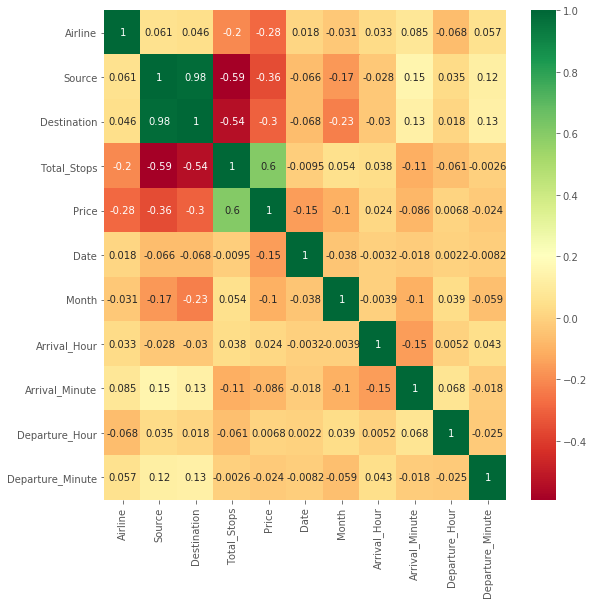

In [45]:
plt.figure(figsize=(9,9))
sns.heatmap(df_train.corr(), annot=True, cmap='RdYlGn')

In [39]:
X=df_train.loc[:,['Airline', 'Source', 'Destination', 'Total_Stops', 'Date', 'Month', 'Arrival_Hour', 'Arrival_Minute',
       'Departure_Hour', 'Departure_Minute']]

In [40]:
y=df_train['Price']

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [46]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [47]:
y_pred = rf.predict(X_test)

In [48]:
rf.score(X_train, y_train)

0.956969054562617

In [49]:
rf.score(X_test, y_test)

0.8103047000685741

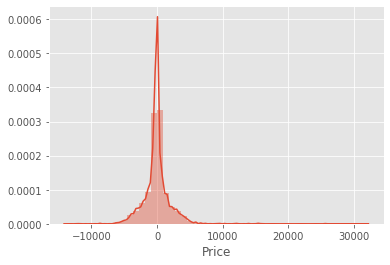

In [50]:
sns.distplot(y_test-y_pred)
plt.show()

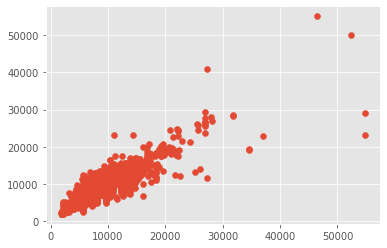

In [51]:
plt.scatter(y_test,y_pred)

In [52]:
len(y_pred)

3205

In [53]:
from sklearn import metrics
print('R square:', np.sqrt(metrics.r2_score(y_test, y_pred)))
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R square: 0.9001692618994352
MAE: 1195.2339426763651
MSE: 4095515.072575027
RMSE: 2023.737896214583


In [54]:
from sklearn.model_selection import RandomizedSearchCV

In [55]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [56]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [57]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
Rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 50, cv = 5, verbose=2, random_state=42, n_jobs =-1)

In [61]:
Rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [62]:
Rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 15}

In [63]:
prediction = Rf_random.predict(X_test)

In [64]:
Rf_random.score(X_train, y_train)

-1823521.3117374417

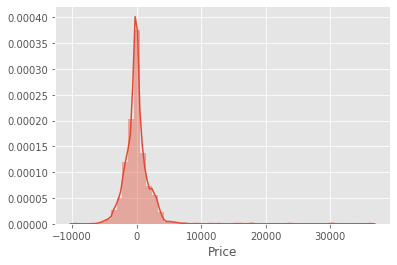

In [65]:
sns.distplot(y_test-prediction)

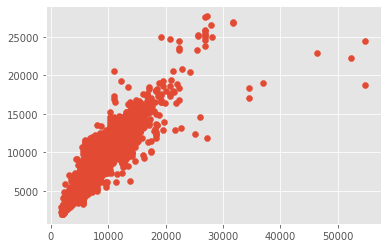

In [66]:
plt.scatter(y_test, prediction)

In [67]:
from sklearn import metrics
print('R square:', np.sqrt(metrics.r2_score(y_test, prediction)))
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

R square: 0.8918240737868979
MAE: 1254.3947591268286
MSE: 4418382.682672645
RMSE: 2101.9949292690135


In [73]:
df_test.head()

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Date,Month,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute
0,0,0,0,17:30,04:25,10h 55m,1,6,6,4,25,17,30
1,1,1,1,06:20,10:20,4h,1,12,5,10,20,6,20
2,0,0,0,19:15,19:00,23h 45m,1,21,5,19,0,19,15
3,3,0,0,08:00,21:00,13h,1,21,5,21,0,8,0
4,6,2,2,23:55,02:45,2h 50m,0,24,6,2,45,23,55


In [74]:
df_test.drop(['Dep_Time','Arrival_Time','Duration'],axis=1,inplace=True)

In [86]:
final_preds=Rf_random.predict(df_test)

In [85]:
price_df= pd.DataFrame(final_preds, columns=["Price"])
price_df.head()

,Price
0,11786.722096
1,4475.750928
2,14676.568801
3,10627.284405
4,4244.677962


In [90]:
price_df.to_csv('Price_output.csv', index=False)

In [95]:
import pickle
# open a file, where you ant to store the data
file = open('flight_rf.pkl', 'wb')

# dump information to that file
pickle.dump(rf, file)

In [97]:
model = open('flight_rf.pkl','rb')
forest = pickle.load(model)

In [98]:
y_prediction = forest.predict(X_test)

In [99]:
metrics.r2_score(y_test, y_prediction)

0.8103047000685741